In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [2]:
Loan=pd.read_csv('/content/raw-data.csv')
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24,0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
1,2,0,1,24,1,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
2,3,0,0,26,0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31.0,31.0,16.0,TIER 1,0.0
3,4,0,0,24,0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
4,5,0,0,27,0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0


In [3]:
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24,0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0
1,2,0,1,24,1,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0.0,0.0,0.0,TIER 1,0.0


In [4]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Customer ID                                                     28012 non-null  int64  
 1   Customer has bounced in first EMI                               28012 non-null  int64  
 2   No of times bounced 12 months                                   28012 non-null  int64  
 3   Maximum MOB                                                     28012 non-null  int64  
 4   No of times bounced while repaying the loan                     28012 non-null  int64  
 5   EMI                                                             28011 non-null  float64
 6   Loan Amount                                                     28011 non-null  float64
 7   Tenure                                           

In [5]:
# Missing values treatment
Loan_renamed.dropna(axis=0,how='any',subset=['Loan Amount','Gender'],inplace=True)

In [6]:
#Removing irrelevant columns
irrelevant_columns = ['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)']
Loan_renamed.drop(['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)'], axis = 1, inplace = True)
Loan_renamed.shape

(28011, 30)

Target variable
0.0    27328
1.0      683
Name: count, dtype: int64


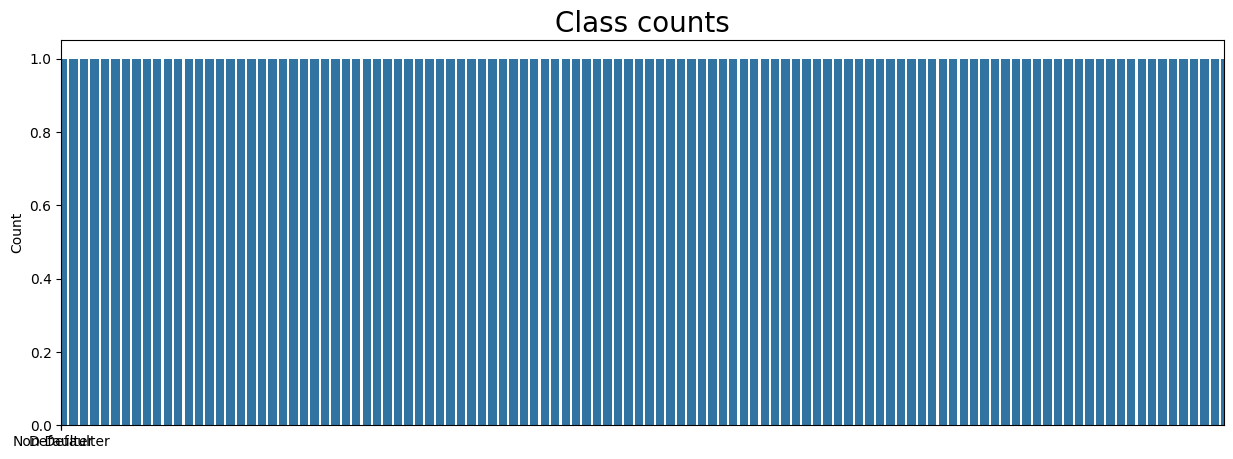

In [7]:
# Getting the number of positive and negative examples.
plt.figure(figsize=(15,5))
sns.countplot(Loan_renamed['Target variable'])
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

print(Loan_renamed['Target variable'].value_counts())

Text(0.5, 1.0, 'Loan Amount (Box Plot)')

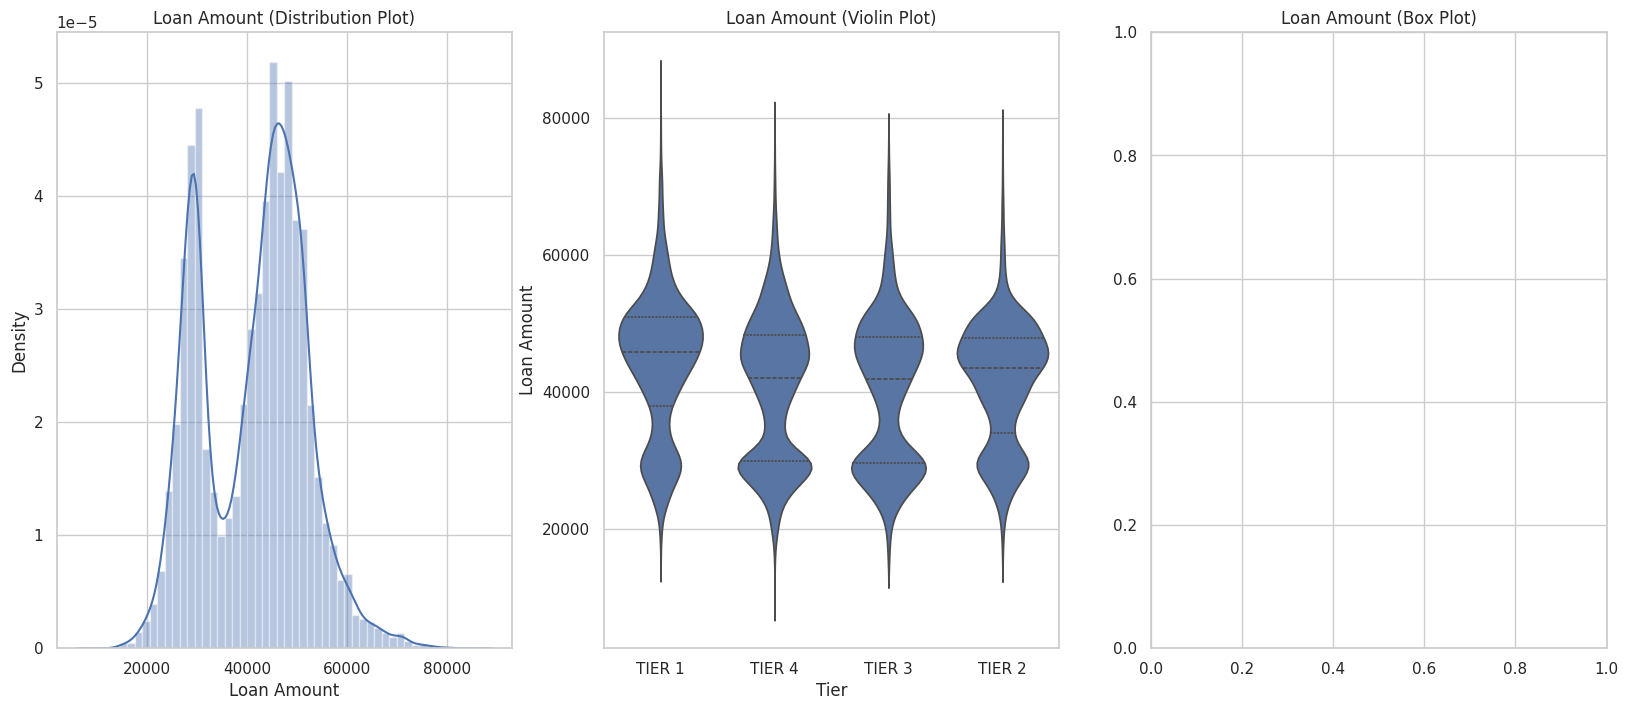

In [8]:
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.distplot(Loan_renamed['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =Loan_renamed, x='Tier',y='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")

<Axes: xlabel='Customer age when loanwas taken', ylabel='Loan Amount'>

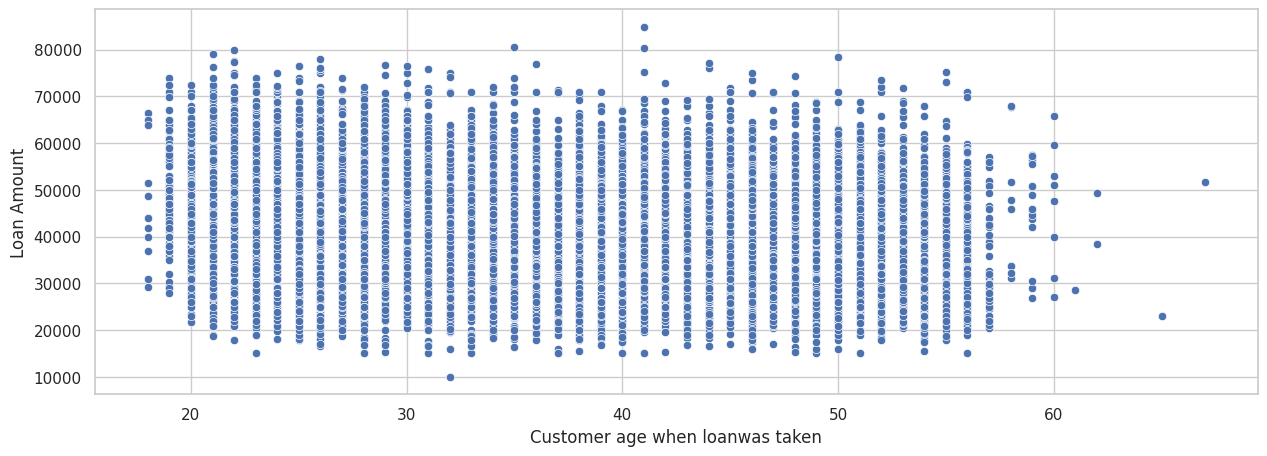

In [9]:
# Explore correlation between age and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(x=Loan_renamed['Customer age when loanwas taken'],y='Loan Amount',data=Loan_renamed)

In [27]:
print(Loan_renamed.columns)

Index(['customer_id', 'customer_has_bounced_in_first_emi',
       'no_of_times_bounced_12_months', 'maximum_mob',
       'no_of_times_bounced_while_repaying_the_loan', 'emi', 'loan_amount',
       'tenure',
       'dealer_codes_from_where_customer_has_purchased_the_two_wheeler',
       'product_code_of_two_wheeler', 'no_of_advance_emi_paid',
       'rate_of_interest', 'gender', 'employment_type',
       'resident_type_of_customer', 'date_of_birth',
       'customer_age_when_loanwas_taken', 'no_of_loans', 'no_of_secured_loans',
       'no_of_unsecured_loans', 'max_amount_sanctioned_in_the_live_loans',
       'no_of_new_loans_in_last_3_months',
       'total_sanctioned_amount_in_the_secured_loans_which_are_live',
       'total_sanctioned_amount_in_the_unsecured_loans_which_are_live',
       'maximum_amount_sanctioned_for_any_two_wheeler_loan',
       'no_of_times_30_days_past_due_in_last_6_months',
       'no_of_times_60_days_past_due_in_last_6_months',
       'no_of_times_90_days_past_d

In [28]:
dropped=['Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

Loan_renamed.drop(dropped,axis=1,inplace=True)


KeyError: "['Max amount sanctioned in the Live loans', 'Total sanctioned amount in the secured Loans which are Live', 'Total sanctioned amount in the unsecured Loans which are Live', 'Maximum amount sanctioned for any Two wheeler loan'] not found in axis"


Data Cleaning


In [15]:
data = Loan_renamed.copy()

# Imputing missing values


CatVariables = data.select_dtypes(include=['object'])
NumVariables = data.select_dtypes(include=['float','int'])



#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


data.head(1)


,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,max_amount_sanctioned_in_the_live_loans,no_of_new_loans_in_last_3_months,total_sanctioned_amount_in_the_secured_loans_which_are_live,total_sanctioned_amount_in_the_unsecured_loans_which_are_live,maximum_amount_sanctioned_for_any_two_wheeler_loan,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24,0,2432.0,46500.0,24.0,1385.0,2,...,NaN,0.0,NaN,NaN,46500.0,0.0,0.0,0.0,0,0.0


In [16]:
numerical_cols = data[NumVariables]
categorical_cols = data[CatVariables]